d:\0ilraypan\python_work\env\tensorflow=1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\0ilraypan\python_work\env\tensorflow=1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\0ilraypan\python_work\env\tensorflow=1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\0ilraypan\python_work\env\tensorflow=1.14\l

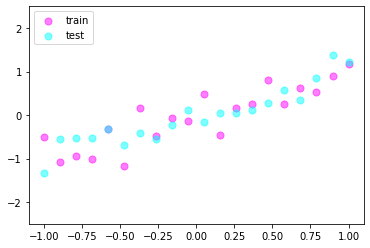

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use keras.layers.dropout instead.


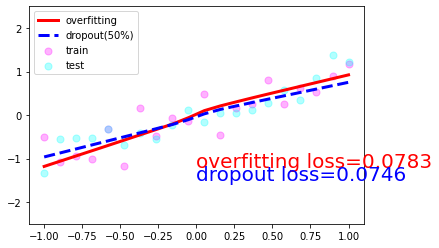

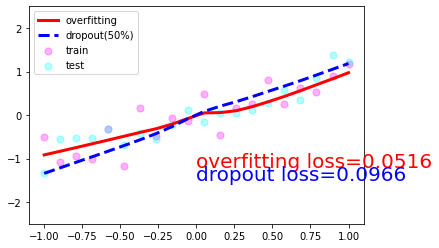

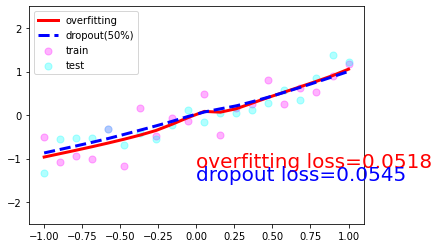

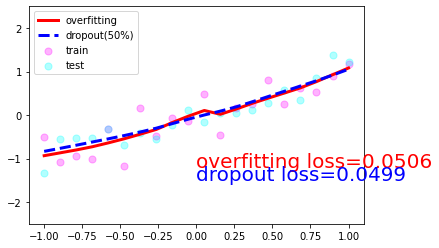

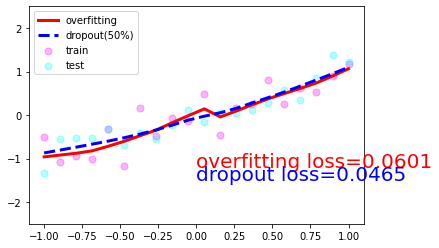

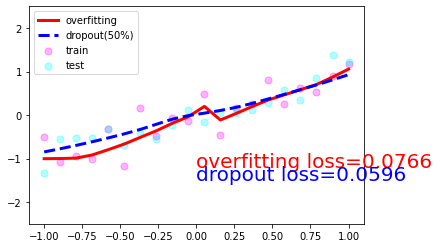

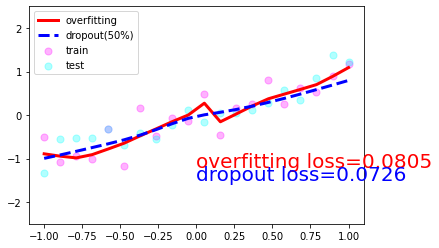

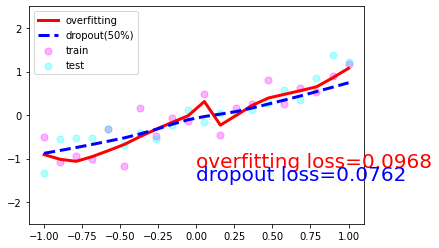

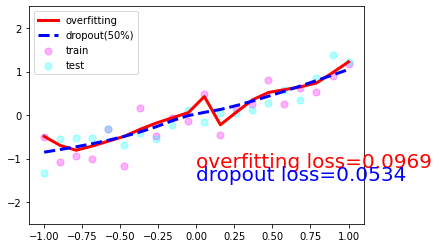

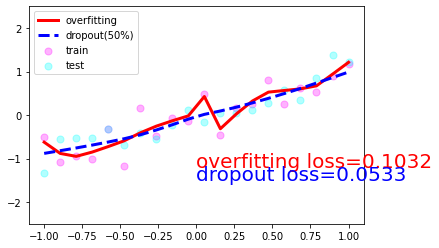

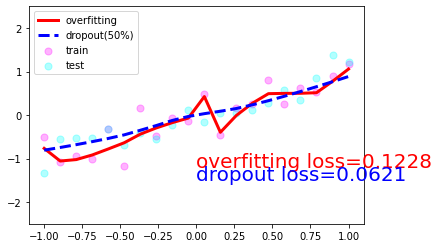

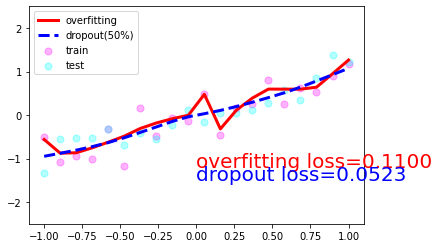

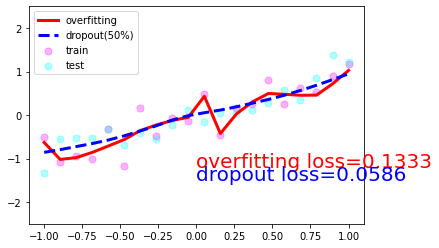

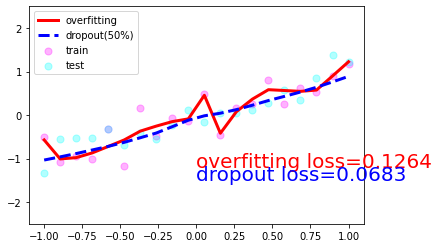

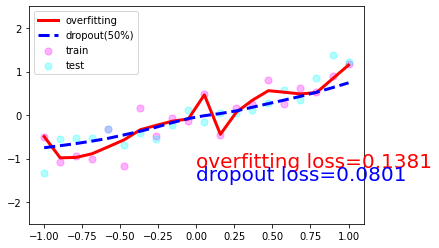

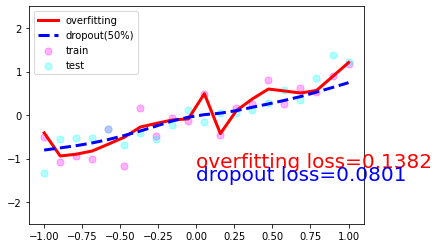

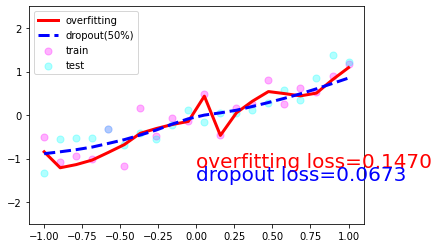

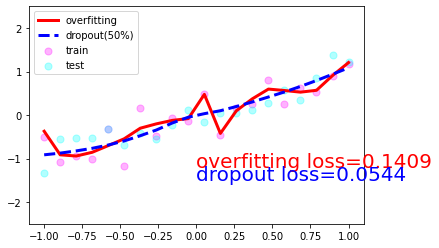

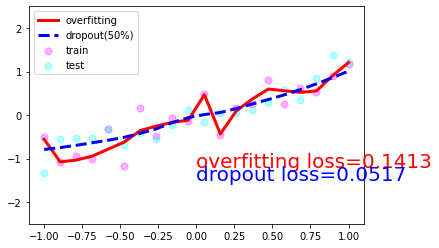

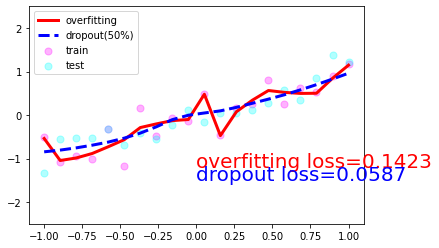

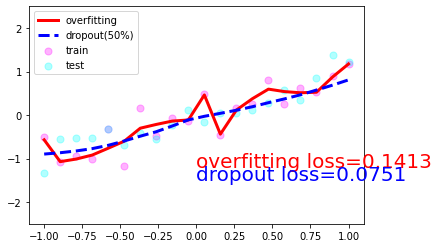

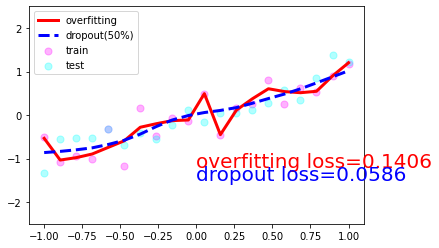

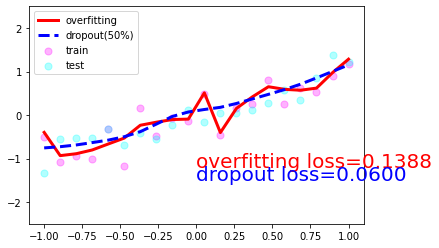

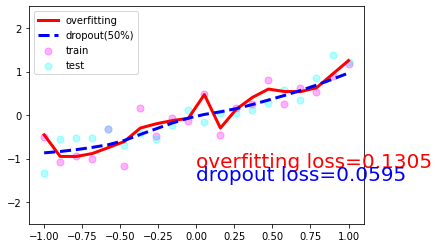

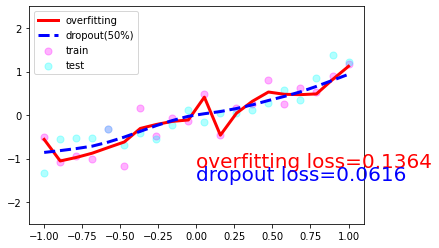

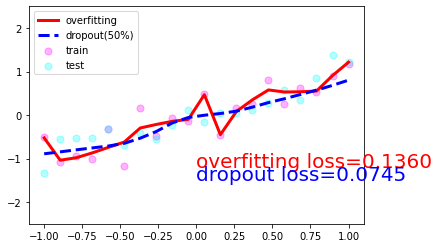

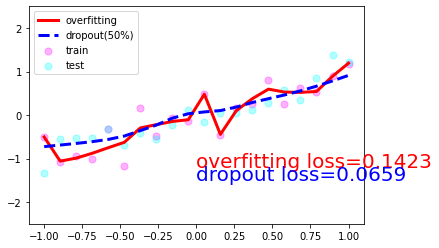

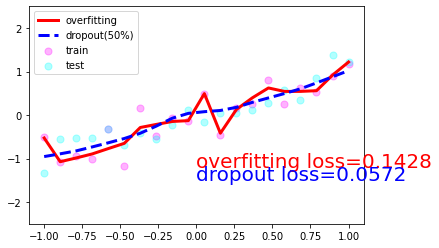

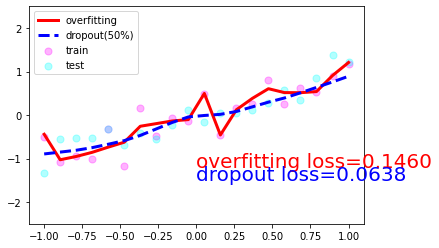

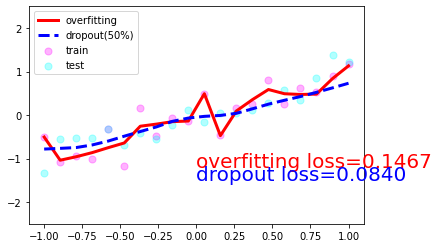

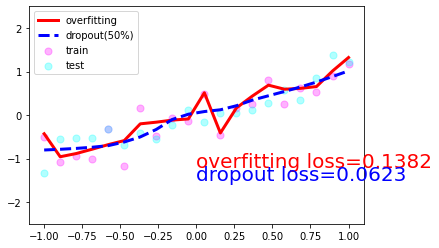

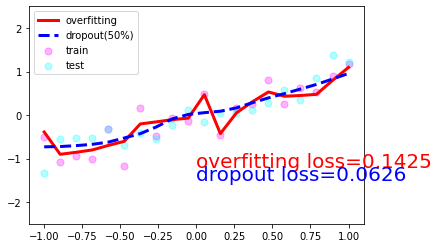

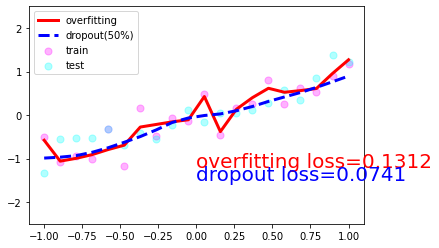

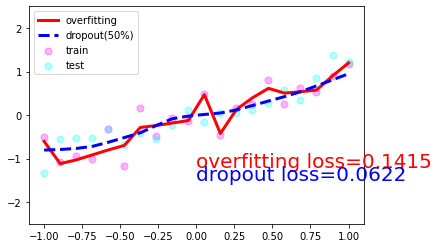

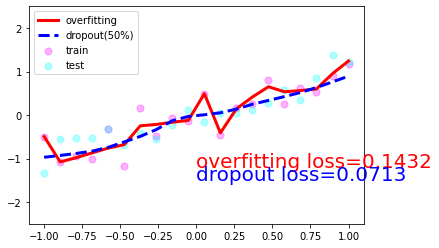

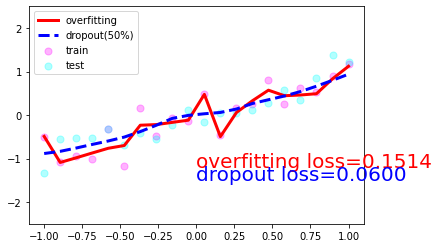

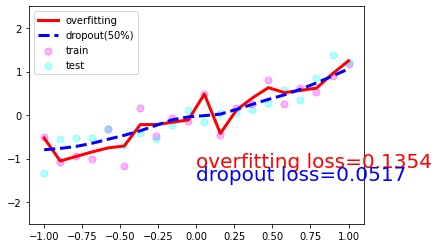

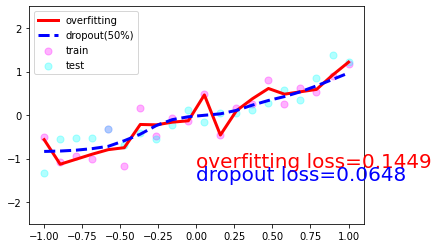

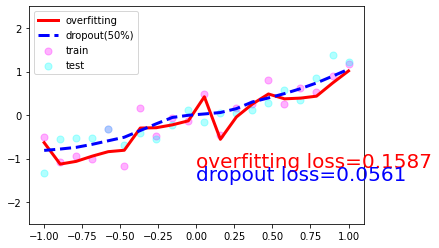

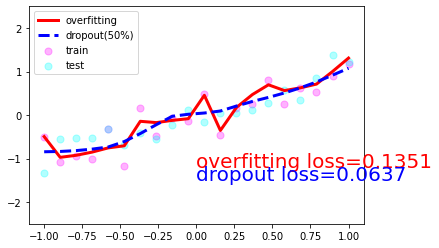

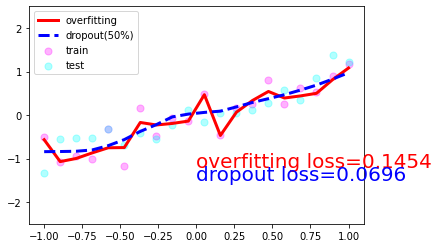

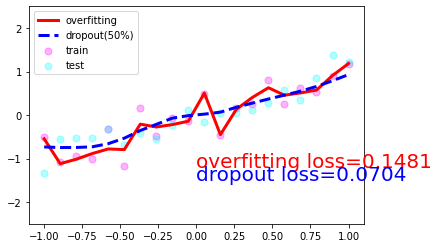

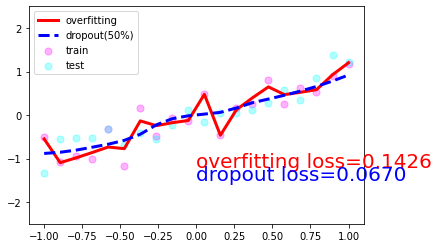

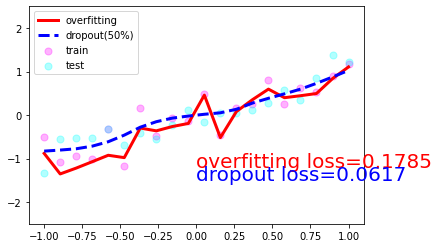

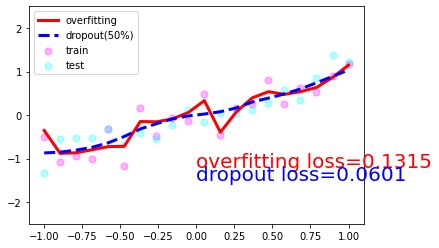

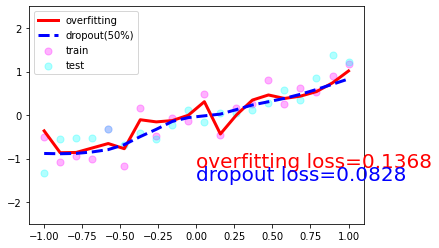

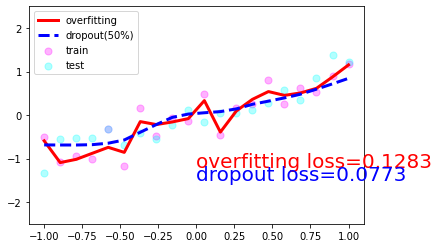

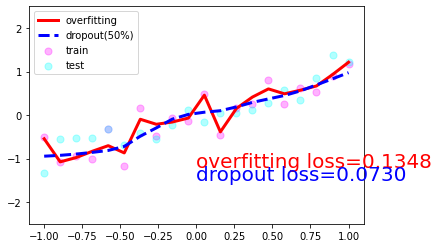

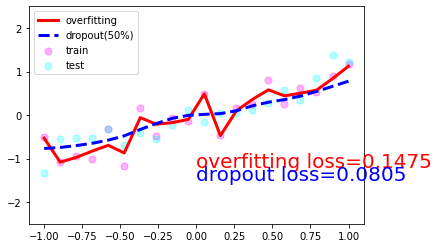

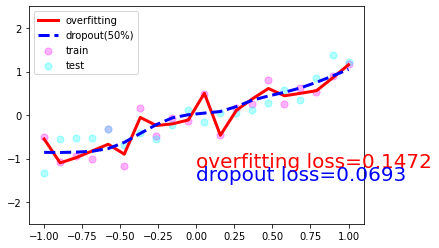

In [1]:
"""
Know more, visit my Python tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
tensorflow: 1.1.0
matplotlib
numpy
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(1)
np.random.seed(1)

# Hyper parameters
N_SAMPLES = 20
N_HIDDEN = 300
LR = 0.01

# training data
x = np.linspace(-1, 1, N_SAMPLES)[:, np.newaxis]
y = x + 0.3*np.random.randn(N_SAMPLES)[:, np.newaxis]

# test data
test_x = x.copy()
test_y = test_x + 0.3*np.random.randn(N_SAMPLES)[:, np.newaxis]

# show data
plt.scatter(x, y, c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x, test_y, c='cyan', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()

# tf placeholders
tf_x = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])
tf_is_training = tf.placeholder(tf.bool, None)  # to control dropout when training and testing

# overfitting net
o1 = tf.layers.dense(tf_x, N_HIDDEN, tf.nn.relu)
o2 = tf.layers.dense(o1, N_HIDDEN, tf.nn.relu)
o_out = tf.layers.dense(o2, 1)
o_loss = tf.losses.mean_squared_error(tf_y, o_out)
o_train = tf.train.AdamOptimizer(LR).minimize(o_loss)

# dropout net
d1 = tf.layers.dense(tf_x, N_HIDDEN, tf.nn.relu)
d1 = tf.layers.dropout(d1, rate=0.5, training=tf_is_training)   # drop out 50% of inputs
d2 = tf.layers.dense(d1, N_HIDDEN, tf.nn.relu)
d2 = tf.layers.dropout(d2, rate=0.5, training=tf_is_training)   # drop out 50% of inputs
d_out = tf.layers.dense(d2, 1)
d_loss = tf.losses.mean_squared_error(tf_y, d_out)
d_train = tf.train.AdamOptimizer(LR).minimize(d_loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

plt.ion()   # something about plotting

for t in range(500):
    sess.run([o_train, d_train], {tf_x: x, tf_y: y, tf_is_training: True})  # train, set is_training=True

    if t % 10 == 0:
        # plotting
        plt.cla()
        o_loss_, d_loss_, o_out_, d_out_ = sess.run(
            [o_loss, d_loss, o_out, d_out], {tf_x: test_x, tf_y: test_y, tf_is_training: False} # test, set is_training=False
        )
        plt.scatter(x, y, c='magenta', s=50, alpha=0.3, label='train'); plt.scatter(test_x, test_y, c='cyan', s=50, alpha=0.3, label='test')
        plt.plot(test_x, o_out_, 'r-', lw=3, label='overfitting'); plt.plot(test_x, d_out_, 'b--', lw=3, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % o_loss_, fontdict={'size': 20, 'color':  'red'}); plt.text(0, -1.5, 'dropout loss=%.4f' % d_loss_, fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left'); plt.ylim((-2.5, 2.5)); plt.pause(0.1)

plt.ioff()
plt.show()